<a href="https://colab.research.google.com/github/DIPANJAN001/Deep-Reinforcement-Learning-for-MicroGrids/blob/master/FinalRLEnvironment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import gym
from gym.utils import seeding
from gym.spaces import Space, Discrete, MultiDiscrete,  Box
from gym.spaces.space import Space
import numpy as np

In [117]:
PV=[]
demand=[]
grid_exp=[]
grid_imp=[]

In [118]:
class MyEnv3(gym.Env):
    
      def __init__(self):
        
        self.action_space = Discrete(4)
        self.observation_space=Box(low=np.array([0]),high=np.array([50]),dtype=np.float32) 
        #self.battery_efficiency=0.3
        self.battery_cap=30
        self.max_battery_discharge=15
        self.max_battery_charge=10
        self.max_battery_capacity=50
        #self.reward, self.done, self.info= None, None, None
        #self.grid_import=0
        #self.grid_export=0
        self.info=None
      def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

      def _step(self,action):
        grid_import_=0
        grid_export_=0
        done=False
        load=np.random.randint(110,180)
        pv=np.random.randint(110,150)
        battery_state=self.battery_cap
        PV.append(pv)
        demand.append(load)
        #net_load=max((load-power),0)
        #net_rem=max(net_load-(self.battery_efficiency*self.battery_cap),0)
        info={}
        reward=0
        #battery_chng=0
        
        if action== 0:
          grid_export_= max(pv-load-self.max_battery_charge,0) # grid export
          self.battery_cap= max(min(self.battery_cap+min(self.max_battery_charge,pv-load),50),0)
          grid_import_=0
          info={
              'grid_export':grid_export_,
              'grid_import':grid_import_
          }
          grid_exp.append(grid_export_)
          grid_imp.append(grid_import_)
        if action== 1:
          grid_export_= max(pv-load-self.max_battery_charge,0) # grid export
          self.battery_cap= max(min(self.battery_cap+min(self.max_battery_charge,pv-load),50),0)
          grid_import_=0
          # only battery charge
          info={
              'grid_export':grid_export_,
              'grid_import':grid_import_
          }
          grid_exp.append(grid_export_)
          grid_imp.append(grid_import_)
        if action== 2:
            grid_export_=0
            self.battery_cap= min(max(self.battery_cap-min(self.max_battery_discharge,load-pv),0),50)# battery discharge
            grid_import_=max(load-pv-self.max_battery_discharge,0)
            info={
              'grid_export':grid_export_,
              'grid_import':grid_import_
             }
            grid_exp.append(grid_export_)
            grid_imp.append(grid_import_)
        if action== 3:
          grid_export_=0
          self.battery_cap= min(max(self.battery_cap-min(self.max_battery_discharge,load-pv),0),50)#change in battery
          grid_import_=max(load-pv-self.max_battery_discharge,0)
         #only battery discharge
          info={
              'grid_export':grid_export_,
              'grid_import':grid_import_
                    } 
          grid_exp.append(grid_export_)
          grid_imp.append(grid_import_)    
        
        reward=grid_export_*8-grid_import_*10
        
        if(self.battery_cap<7.0 or self.battery_cap==50):
              done=True
      
        return battery_state,self.battery_cap,load,pv,reward, done,info
        
      def _reset(self):
        self.battery_cap=30
        #self.done=False
        return self.battery_cap
      

In [119]:
env=MyEnv3()

In [120]:
for e in range(120): #Episode
    #Play 20 episodes 
    score = 0
    observation = env._reset()
    #print(observation)
    done=False
    while not done:
        #env.render()
        action = env.action_space.sample()
        print(action)
        observation1,observation2,observation3,observation4,reward,done,info = env._step(action)
        print(observation1,observation2,observation3,observation4)
        print(info)
        score+=round(reward)
        
        #print(info['load'],info['power'])
      
    print('episode:{} Profit:{}'.format(e,score))

2
30 46 126 142
{'grid_export': 0, 'grid_import': 0}
0
46 49 141 144
{'grid_export': 0, 'grid_import': 0}
0
49 15 149 115
{'grid_export': 0, 'grid_import': 0}
1
15 0 168 124
{'grid_export': 0, 'grid_import': 0}
episode:0 Profit:0
0
30 30 140 140
{'grid_export': 0, 'grid_import': 0}
1
30 30 121 121
{'grid_export': 0, 'grid_import': 0}
0
30 37 119 126
{'grid_export': 0, 'grid_import': 0}
3
37 22 179 129
{'grid_export': 0, 'grid_import': 35}
2
22 7 169 125
{'grid_export': 0, 'grid_import': 29}
1
7 0 164 148
{'grid_export': 0, 'grid_import': 0}
episode:1 Profit:-640
2
30 43 114 127
{'grid_export': 0, 'grid_import': 0}
3
43 28 148 128
{'grid_export': 0, 'grid_import': 5}
0
28 15 134 121
{'grid_export': 0, 'grid_import': 0}
1
15 0 145 116
{'grid_export': 0, 'grid_import': 0}
episode:2 Profit:-50
1
30 40 117 128
{'grid_export': 1, 'grid_import': 0}
0
40 13 159 132
{'grid_export': 0, 'grid_import': 0}
2
13 0 156 143
{'grid_export': 0, 'grid_import': 0}
episode:3 Profit:8
3
30 15 135 113
{'grid

In [121]:
len(PV)
len(demand)
len(grid_exp)
len(grid_imp)

357

In [122]:
time=[i for i in range(len(PV))]

In [123]:
len(time)

357

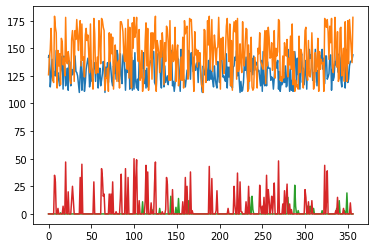

In [124]:
import matplotlib.pyplot as plt
plt.plot(time, PV)
plt.plot(time, demand)
plt.plot(time, grid_exp)
plt.plot(time, grid_imp)
plt.show()

In [125]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [126]:
fig = make_subplots(rows=1, cols=1)

In [129]:
fig.add_trace(go.Scatter(x=time, y=PV),
              row=1, col=1)

fig.add_trace( go.Scatter(x=time, y=demand),
              row=1, col=1)

fig.add_trace(go.Scatter(x=time, y=grid_exp),
              row=1, col=1)

fig.add_trace(go.Scatter(x=time, y=grid_imp),
              row=1, col=1)

fig.show()

In [128]:
fig = px.line( x = time ,y = PV)
fig.show()
fig = px.line( x = time ,y = demand)
fig.show()
fig = px.line( x = time ,y = grid_exp)
fig.show()
fig = px.line( x = time ,y = grid_imp)
fig.show()

### Desigining the agent